In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# load the data file 
df_train=pd.read_csv('/content/gdrive/MyDrive/ML and deep learning projects /Breast Cancer Wisconsin uci repo/breast-cancer-wisconsin.csv',header=None)

In [5]:
df_train.columns=['idnumber','Clump_Thickness','Uniformity_Cell_Size','Uniformity_Cell_Shape','Marginal Adhesion','Single_Epithelial_Cell_Size','Bare Nuclei',
                  'Bland Chromatin','Normal Nucleoli','Mitoses','Class_label']

In [ ]:
df_train.drop('idnumber', 1,inplace=True)

In [6]:
df_train.head()

,idnumber,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal Adhesion,Single_Epithelial_Cell_Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class_label
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Exploratory data analysis

### Drop Null Values

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   idnumber                     699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class_label                  699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
df_train['Bare Nuclei']=df_train['Bare Nuclei'].replace({'?':np.nan})

In [9]:
df_train.dropna(inplace=True)
df_train.reset_index(drop=True, inplace=True)
df_train.shape

(683, 11)

### Class Samples Distribution

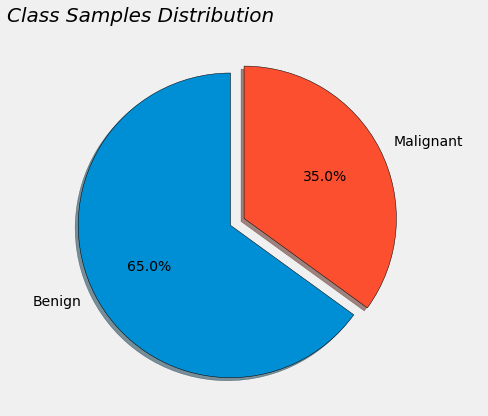

In [10]:
values=df_train['Class_label'].value_counts()
class_size=values.tolist()
plt.style.use("fivethirtyeight")
# Language Popularity
slices = class_size
labels = ['Benign','Malignant']

fig = plt.figure(1, figsize=(7,6))
ax = fig.add_subplot(111)
ax.axis('equal')
expode=[0.1,0]

ax.pie(slices,labels=labels,wedgeprops={'edgecolor': 'black'},
        autopct='%1.1f%%',explode=expode,shadow=True, startangle=90,)

plt.title(label="Class Samples Distribution", 
          loc="left", 
          fontstyle='italic',
          fontsize=20
          ) 
plt.tight_layout()

plt.show()

### Normal Distribution

In [11]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,idnumber,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal Adhesion,Single_Epithelial_Cell_Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class_label
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2


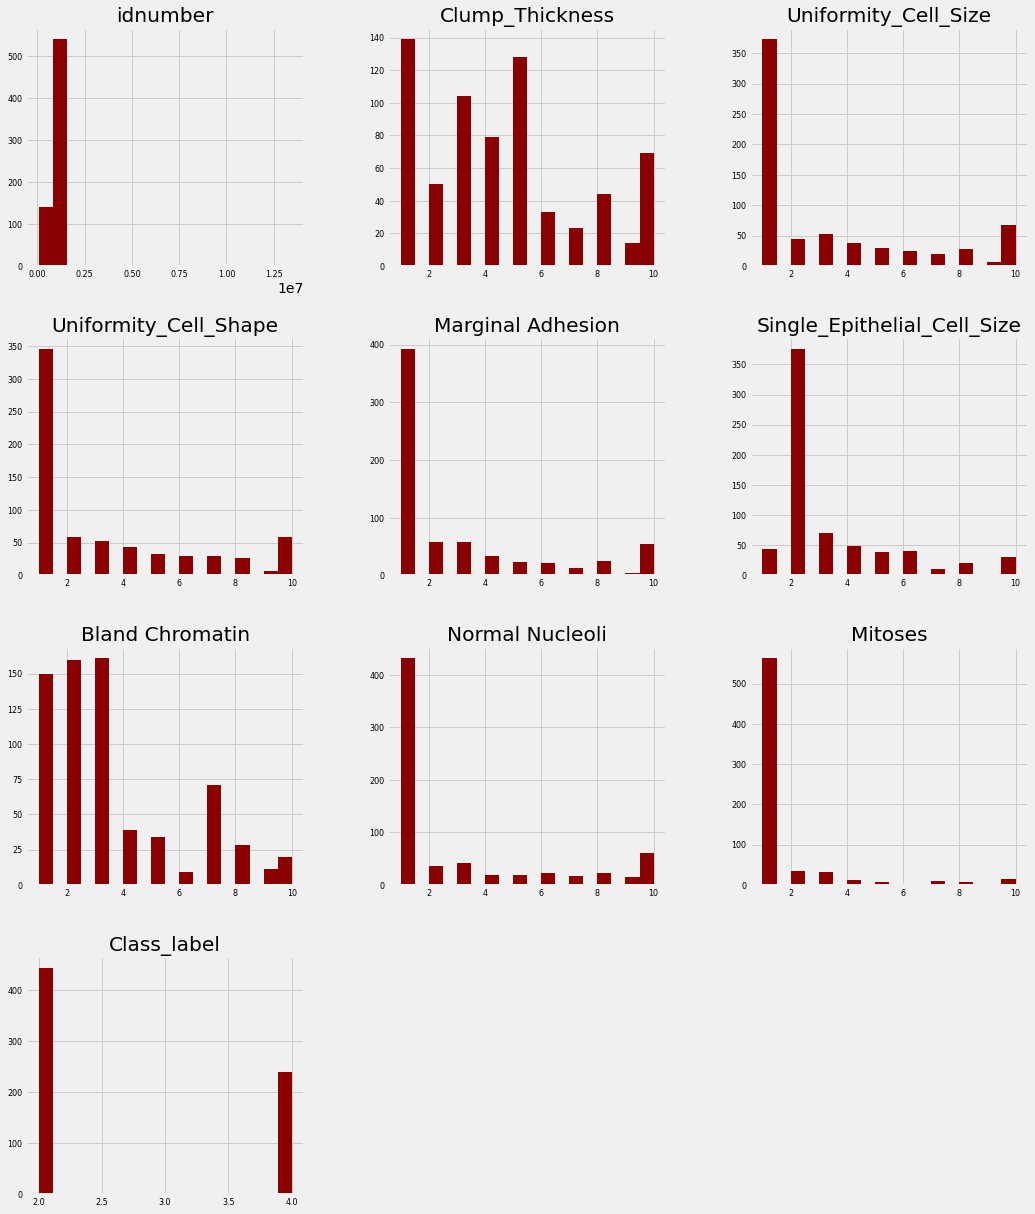

In [14]:
df_num.hist(figsize=(16, 20), bins=18, xlabelsize=8, ylabelsize=8,color = "darkred"); # ; avoid having the matplotlib verbose informations

In [15]:
df_num_corr = df_num.corr()['Class_label'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with class label:\n{}".format(len(golden_features_list), golden_features_list))

There is 7 strongly correlated values with class label:
Uniformity_Cell_Shape          0.821891
Uniformity_Cell_Size           0.820801
Bland Chromatin                0.758228
Normal Nucleoli                0.718677
Clump_Thickness                0.714790
Marginal Adhesion              0.706294
Single_Epithelial_Cell_Size    0.690958
Name: Class_label, dtype: float64


In [16]:
X=df_train.iloc[:, 0:-1] 
Y= df_train.iloc[:, -1]
X

,idnumber,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal Adhesion,Single_Epithelial_Cell_Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1
679,841769,2,1,1,1,2,1,1,1,1
680,888820,5,10,10,3,7,3,8,10,2
681,897471,4,8,6,4,3,4,10,6,1


# ML Model

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
classifier.fit(X_train, y_train)
print('Accuracy score',classifier.score(X_test, y_test))

Accuracy score 0.9513274336283186


## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
Y_Pred_svm = classifier.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_Pred_svm , target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.99      0.97       142
     class 1       0.97      0.90      0.94        84

    accuracy                           0.96       226
   macro avg       0.96      0.95      0.95       226
weighted avg       0.96      0.96      0.96       226



## Bagging Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.8f}'.format(acc_test)) 

Test set accuracy of bc: 0.96017699


## Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf.fit(X_train, y_train)
Y_Pred_boost = clf.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_Pred_boost , target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.99      0.96       142
     class 1       0.97      0.87      0.92        84

    accuracy                           0.94       226
   macro avg       0.95      0.93      0.94       226
weighted avg       0.94      0.94      0.94       226



### Ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator=model, n_estimators=50, learning_rate=1)
boostmodel = AdaBoost.fit(X_train, y_train)
y_pred_ada = boostmodel.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_ada , target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.99      0.96       142
     class 1       0.97      0.89      0.93        84

    accuracy                           0.95       226
   macro avg       0.96      0.94      0.95       226
weighted avg       0.95      0.95      0.95       226



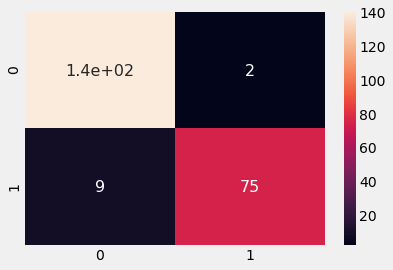

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, y_pred_ada)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})

## k Neighbors classifier & Validation Curve 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predic_knn=neigh.predict(X_test)
acc_test = accuracy_score(y_test, predic_knn)
print('Test set accuracy of bc: {:.8f}'.format(acc_test)) 

Test set accuracy of bc: 0.95132743


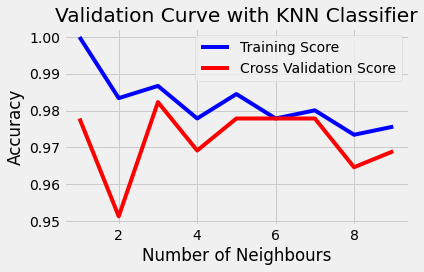

In [ ]:
# Import Required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
parameter_range = np.arange(1, 10, 1)
train_score, test_score = validation_curve(KNeighborsClassifier(), X_test, y_test,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'r')

plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()